In [1]:
# Importing Important Python Libraries

import matplotlib.pyplot as plt
import wordcloud
import requests
import bs4

In [2]:
# Text Input Options

print("Choose text input options :")
print("1. Insert text as input")
print("2. Input text from a locally saved text file")
print("3. Input text from a url")
choice = int(input("Enter Choice: "))

Choose text input options :
1. Insert text as input
2. Input text from a locally saved text file
3. Input text from a url
Enter Choice: 3


In [3]:
# Text Input

if (choice == 1):
    file_contents = input("Enter text: ")
elif (choice == 2):
    path = input("Enter the path (Unix-style) of text file: ")
    with open(path,'r',encoding='utf-8') as f:
        file_contents = f.read()
elif (choice == 3):
    url = input("Enter url: ")
    response = requests.get(url)
    soup = bs4.BeautifulSoup(response.content)
    file_contents = soup.text
else:
    print("Invalid Input")

Enter url: https://www.gutenberg.org/files/2600/2600-h/2600-h.htm


In [4]:
# Main Frequency Function

def calculate_frequencies(file_contents):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~“”'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", "so", "up", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "in", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "on", "not", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", "down", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", "out", "go"]
    
    words = file_contents.split() 
    frequency = dict()
    for index,word in enumerate(words):
        for idx,char in enumerate(word.lower()):
            if (char in punctuations):
                word = word[:idx] + word[idx + 1:]
        if(word.lower() not in uninteresting_words and len(word) > 1):
            if(word not in frequency):
                frequency[word] = 1
            else:
                frequency[word] += 1
    
    #wordcloud
    cloud = wordcloud.WordCloud(width=800, height=400)
    cloud.generate_from_frequencies(frequency)
    return cloud.to_array()

Image Saved


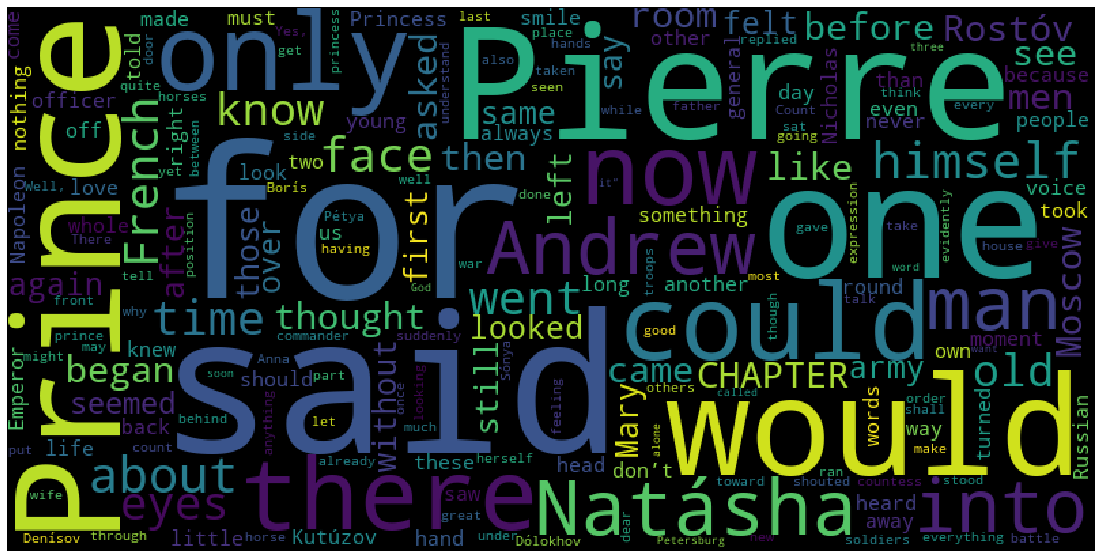

In [5]:
# Displaying our Word Cloud !

if (file_contents):
    myimage = calculate_frequencies(file_contents)
    plt.figure(figsize=(20,10))
    plt.imshow(myimage, interpolation = 'nearest')
    plt.axis('off')    
    plt.savefig("Word_cloud.jpg",dpi=1000)
    print("Image Saved")